In [6]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Loading saved data

In [7]:
pickle_path = '../data/processed/station_data.pkl'
if os.path.exists(pickle_path):
    with open(pickle_path, 'rb') as f:
        station_data = pickle.load(f)
    print("Loaded data from pickle file")
else:
    print("Processed data file not found. Please run the Day 3 notebook first.")

Loaded data from pickle file


Explore data



Exploratory analysis for station1

USGS Observation Statistics:
count    70089.000000
mean         0.252910
std          0.141788
min          0.050000
25%          0.180000
50%          0.240000
75%          0.310000
max          4.080000
Name: USGSFlowValue, dtype: float64

Missing values in USGS data:
USGSFlowValue    0
USGS_GageID      0
dtype: int64

USGS data time range:
Start: 2021-04-20 07:00:00+00:00
End: 2023-04-22 06:45:00+00:00

Time intervals in USGS data:
DateTime
0 days 00:15:00    70027
0 days 01:00:00       61
Name: count, dtype: int64

NWM Forecast Statistics:
count    326159.000000
mean         53.964562
std          46.555739
min           0.300000
25%          20.660000
50%          48.619999
75%          71.339998
max         764.009983
Name: streamflow_value, dtype: float64

Missing values in NWM data:
NWM_version_number           0
model_initialization_time    0
model_output_valid_time      0
streamflow_value             1
streamID                     0
lead_t

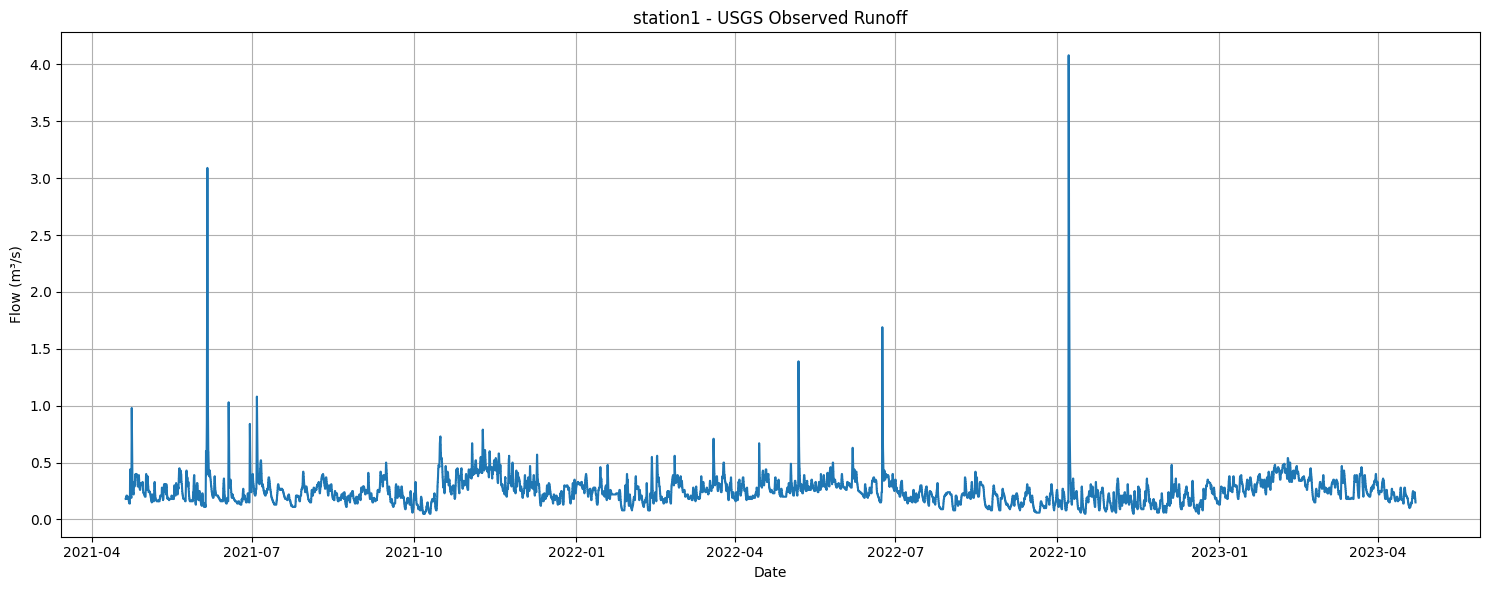

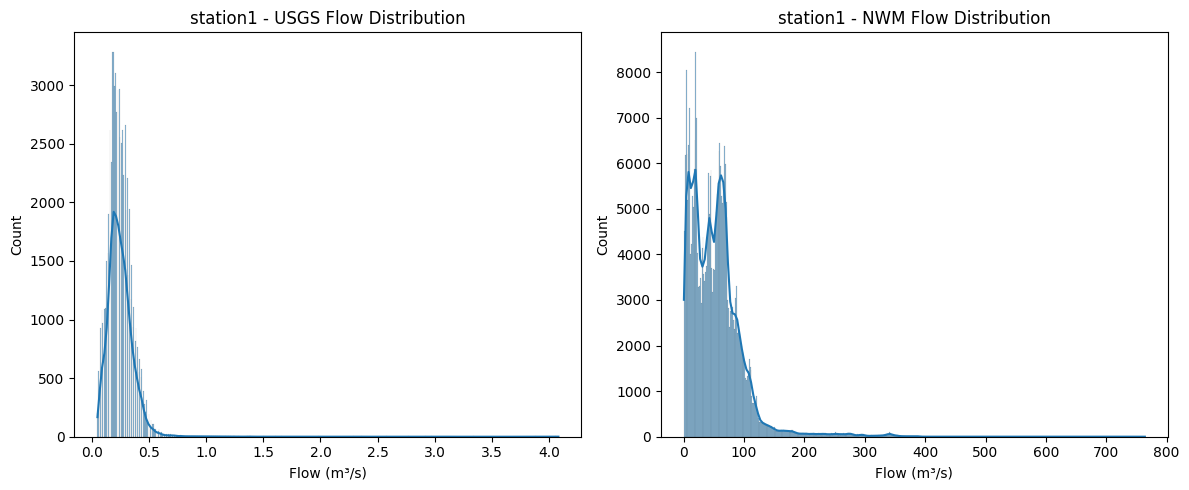

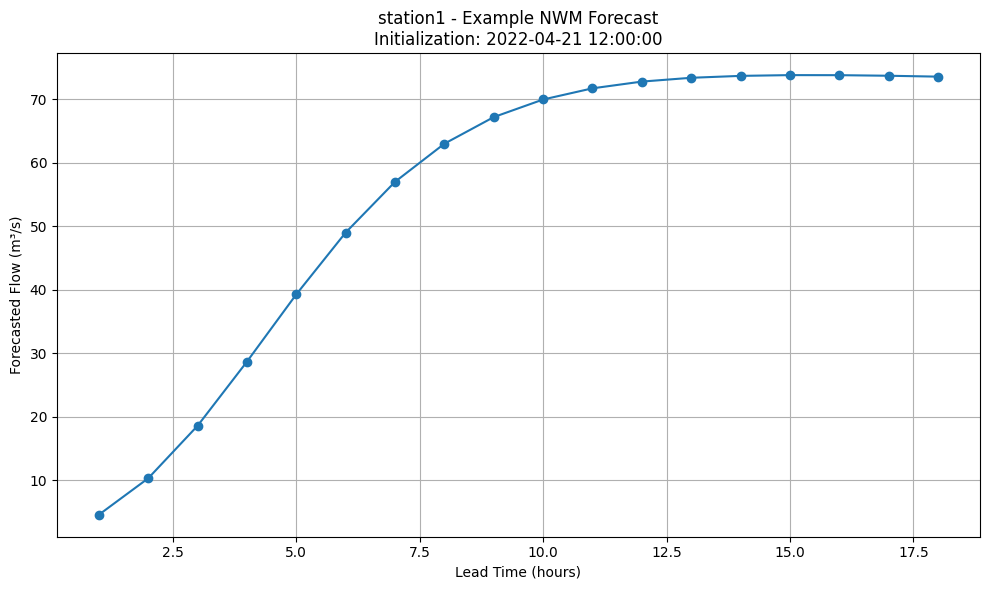



Exploratory analysis for station2

USGS Observation Statistics:
count    65483.000000
mean        12.602763
std         15.002914
min          0.230000
25%          1.740000
50%          6.990000
75%         17.560000
max        136.200000
Name: USGSFlowValue, dtype: float64

Missing values in USGS data:
USGSFlowValue    15
00060_cd         15
dtype: int64

USGS data time range:
Start: 2021-04-20 07:00:00+00:00
End: 2023-04-22 06:45:00+00:00

Time intervals in USGS data:
DateTime
0 days 00:15:00    65056
0 days 02:00:00      305
0 days 06:00:00      111
0 days 00:30:00        7
0 days 01:15:00        6
0 days 00:45:00        4
0 days 01:00:00        3
0 days 01:45:00        2
0 days 01:30:00        2
0 days 04:15:00        1
Name: count, dtype: int64

NWM Forecast Statistics:
count    326160.000000
mean         11.441092
std          16.141266
min           0.150000
25%           1.390000
50%           5.030000
75%          13.000000
max         129.279997
Name: streamflow_value, dty

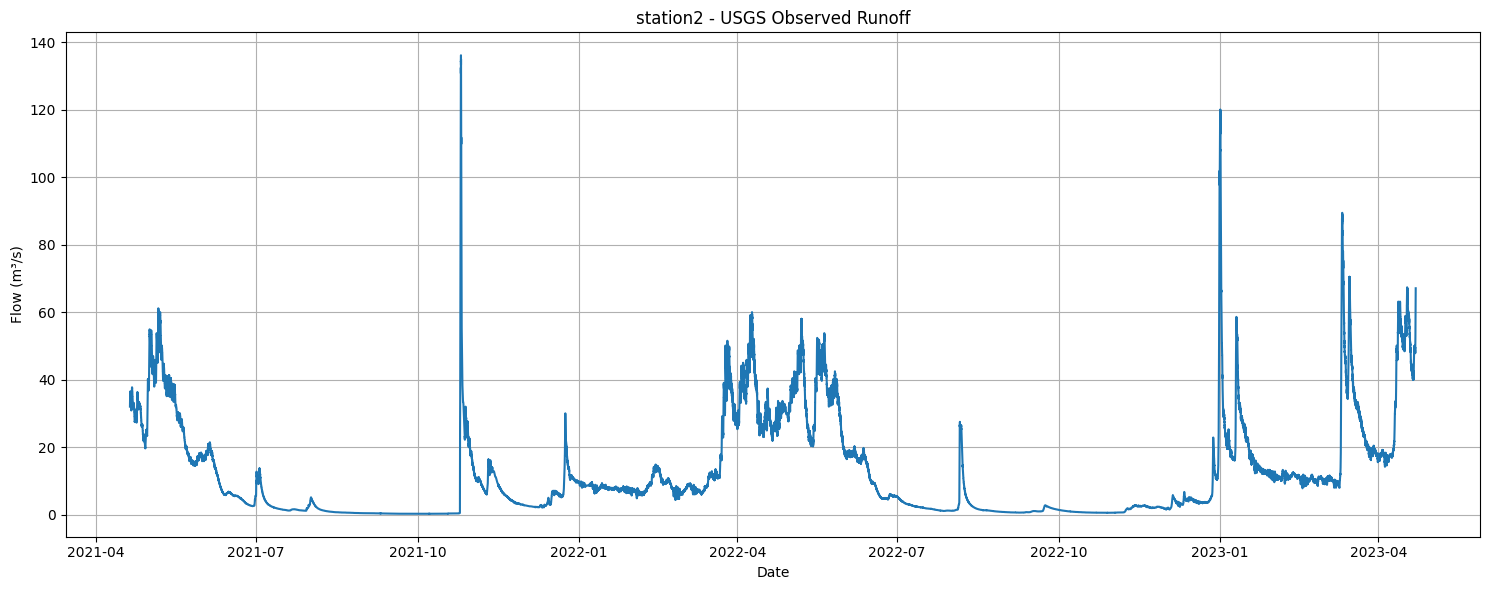

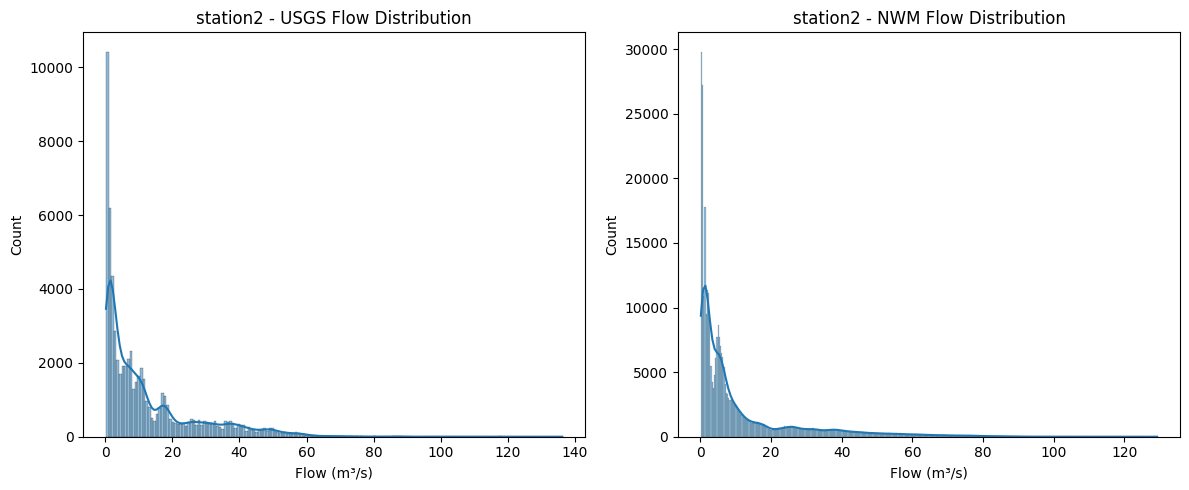

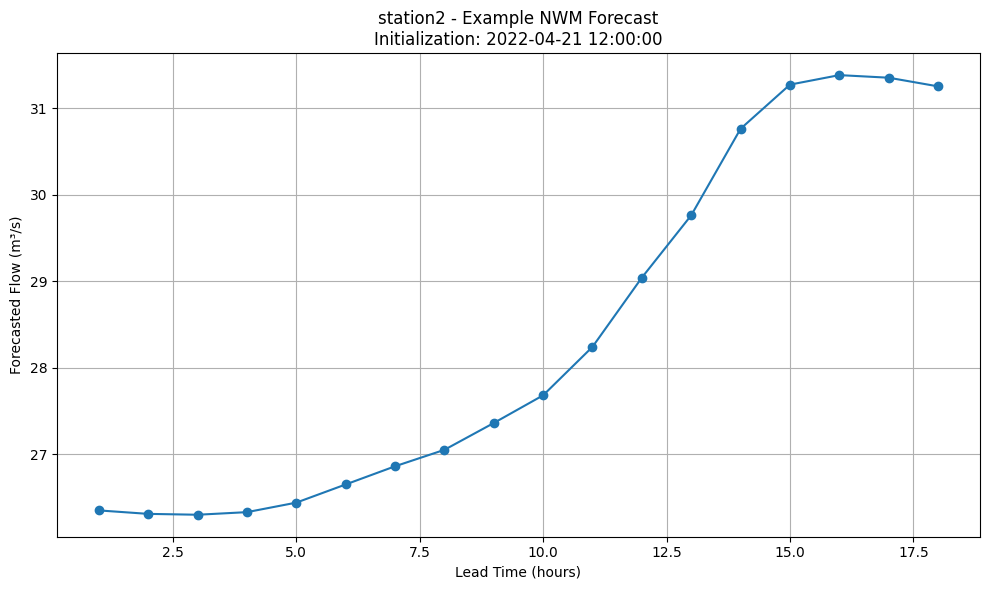

In [11]:
for station_name, data in station_data.items():
    usgs_data = data['usgs']
    nwm_data = data['nwm']
    
    print(f"\n\n{'='*50}")
    print(f"Exploratory analysis for {station_name}")
    print(f"{'='*50}")
    
    # Basic stats of USGS observations
    print("\nUSGS Observation Statistics:")
    print(usgs_data['USGSFlowValue'].describe())
    
    # Check for missing values
    missing_usgs = usgs_data.isnull().sum()
    print("\nMissing values in USGS data:")
    print(missing_usgs)
    
    # Time series properties of USGS data
    print("\nUSGS data time range:")
    print(f"Start: {usgs_data.index.min()}")
    print(f"End: {usgs_data.index.max()}")
    
    # Check time intervals
    time_diffs = usgs_data.index.to_series().diff().value_counts()
    print("\nTime intervals in USGS data:")
    print(time_diffs)
    
    # NWM Forecast Statistics
    print("\nNWM Forecast Statistics:")
    print(nwm_data['streamflow_value'].describe())
    
    # Check for missing values
    missing_nwm = nwm_data.isnull().sum()
    print("\nMissing values in NWM data:")
    print(missing_nwm)
    
    # Check NWM initialization times
    init_times = nwm_data['model_initialization_time'].unique()
    print(f"\nNumber of unique forecast initialization times: {len(init_times)}")
    print(f"First initialization time: {init_times.min()}")
    print(f"Last initialization time: {init_times.max()}")
    
    # Check lead times
    lead_times = nwm_data['lead_time'].unique()
    print(f"\nAvailable lead times: {sorted(lead_times)}")
    
    # Create visulizations
    
    # USGS time series plot
    plt.figure(figsize=(15, 6))
    plt.plot(usgs_data.index, usgs_data['USGSFlowValue'])
    plt.title(f'{station_name} - USGS Observed Runoff')
    plt.xlabel('Date')
    plt.ylabel('Flow (m³/s)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"../data/figures/{station_name}_usgs_timeseries.png")
    plt.show()
    
    # Distribution of streamflow plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(usgs_data['USGSFlowValue'], kde=True)
    plt.title(f'{station_name} - USGS Flow Distribution')
    plt.xlabel('Flow (m³/s)')
    
    plt.subplot(1, 2, 2)
    sns.histplot(nwm_data['streamflow_value'], kde=True)
    plt.title(f'{station_name} - NWM Flow Distribution')
    plt.xlabel('Flow (m³/s)')
    
    plt.tight_layout()
    plt.savefig(f"../data/figures/{station_name}_flow_distribution.png")
    plt.show()
    
    # Example forecast plot
    sample_init = init_times[len(init_times)//2]
    sample_forecast = nwm_data[nwm_data['model_initialization_time'] == sample_init]
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_forecast['lead_time'], sample_forecast['streamflow_value'], 'o-')
    plt.title(f'{station_name} - Example NWM Forecast\nInitialization: {sample_init}')
    plt.xlabel('Lead Time (hours)')
    plt.ylabel('Forecasted Flow (m³/s)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"../data/figures/{station_name}_example_forecast.png")
    plt.show()
    
    # Save statistics and convert to DataFrame
    summary = {
        'Station': station_name,
        'USGS_data_points': len(usgs_data),
        'USGS_missing': missing_usgs['USGSFlowValue'],
        'USGS_min_flow': usgs_data['USGSFlowValue'].min(),
        'USGS_max_flow': usgs_data['USGSFlowValue'].max(),
        'USGS_mean_flow': usgs_data['USGSFlowValue'].mean(),
        'NWM_data_points': len(nwm_data),
        'NWM_missing': missing_nwm['streamflow_value'],
        'NWM_min_flow': nwm_data['streamflow_value'].min(),
        'NWM_max_flow': nwm_data['streamflow_value'].max(),
        'NWM_mean_flow': nwm_data['streamflow_value'].mean(),
        'Forecast_init_count': len(init_times),
        'Lead_times': sorted(lead_times)
    }
    
    summary_df = pd.DataFrame([summary])
    summary_df.to_csv(f"../data/processed/{station_name}_summary.csv", index=False)